In [1]:
import pkg_resources

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd 

from pytelpoint.fitting import azel_fit, best_fit_pars
from pytelpoint.visualization import plot_corner, pointing_azel_resid, pointing_histogram, pointing_residuals
from pytelpoint.io import read_azel_datfile, read_raw_datfile
from pytelpoint.transform import azel_model

In [2]:
# this is the K&E pointing run data from august 2021

datafile = pkg_resources.resource_filename("pytelpoint", os.path.join("test_data", "k_and_e.dat"))
coo_ref, coo_meas = read_azel_datfile(datafile)
idata = azel_fit(coo_ref, coo_meas)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/home/tim/conda/envs/pytelpoint/lib/python3.9/site-packages/pymc/model.py:984: FutureWarning: `Model.initial_point` has been deprecated. Use `Model.recompute_initial_point(seed=None)`.
  warnings.warn(
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ia, ie, an, aw, ca, npae, tf, tx, az_sigma, el_sigma]
/home/tim/conda/envs/pytelpoint/lib/python3.9/site-packages/pymc/model.py:984: FutureWarning: `Model.initial_point` has been deprecated. Use `Model.recompute_initial_point(seed=None)`.
  warnings.warn(


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 119 seconds.


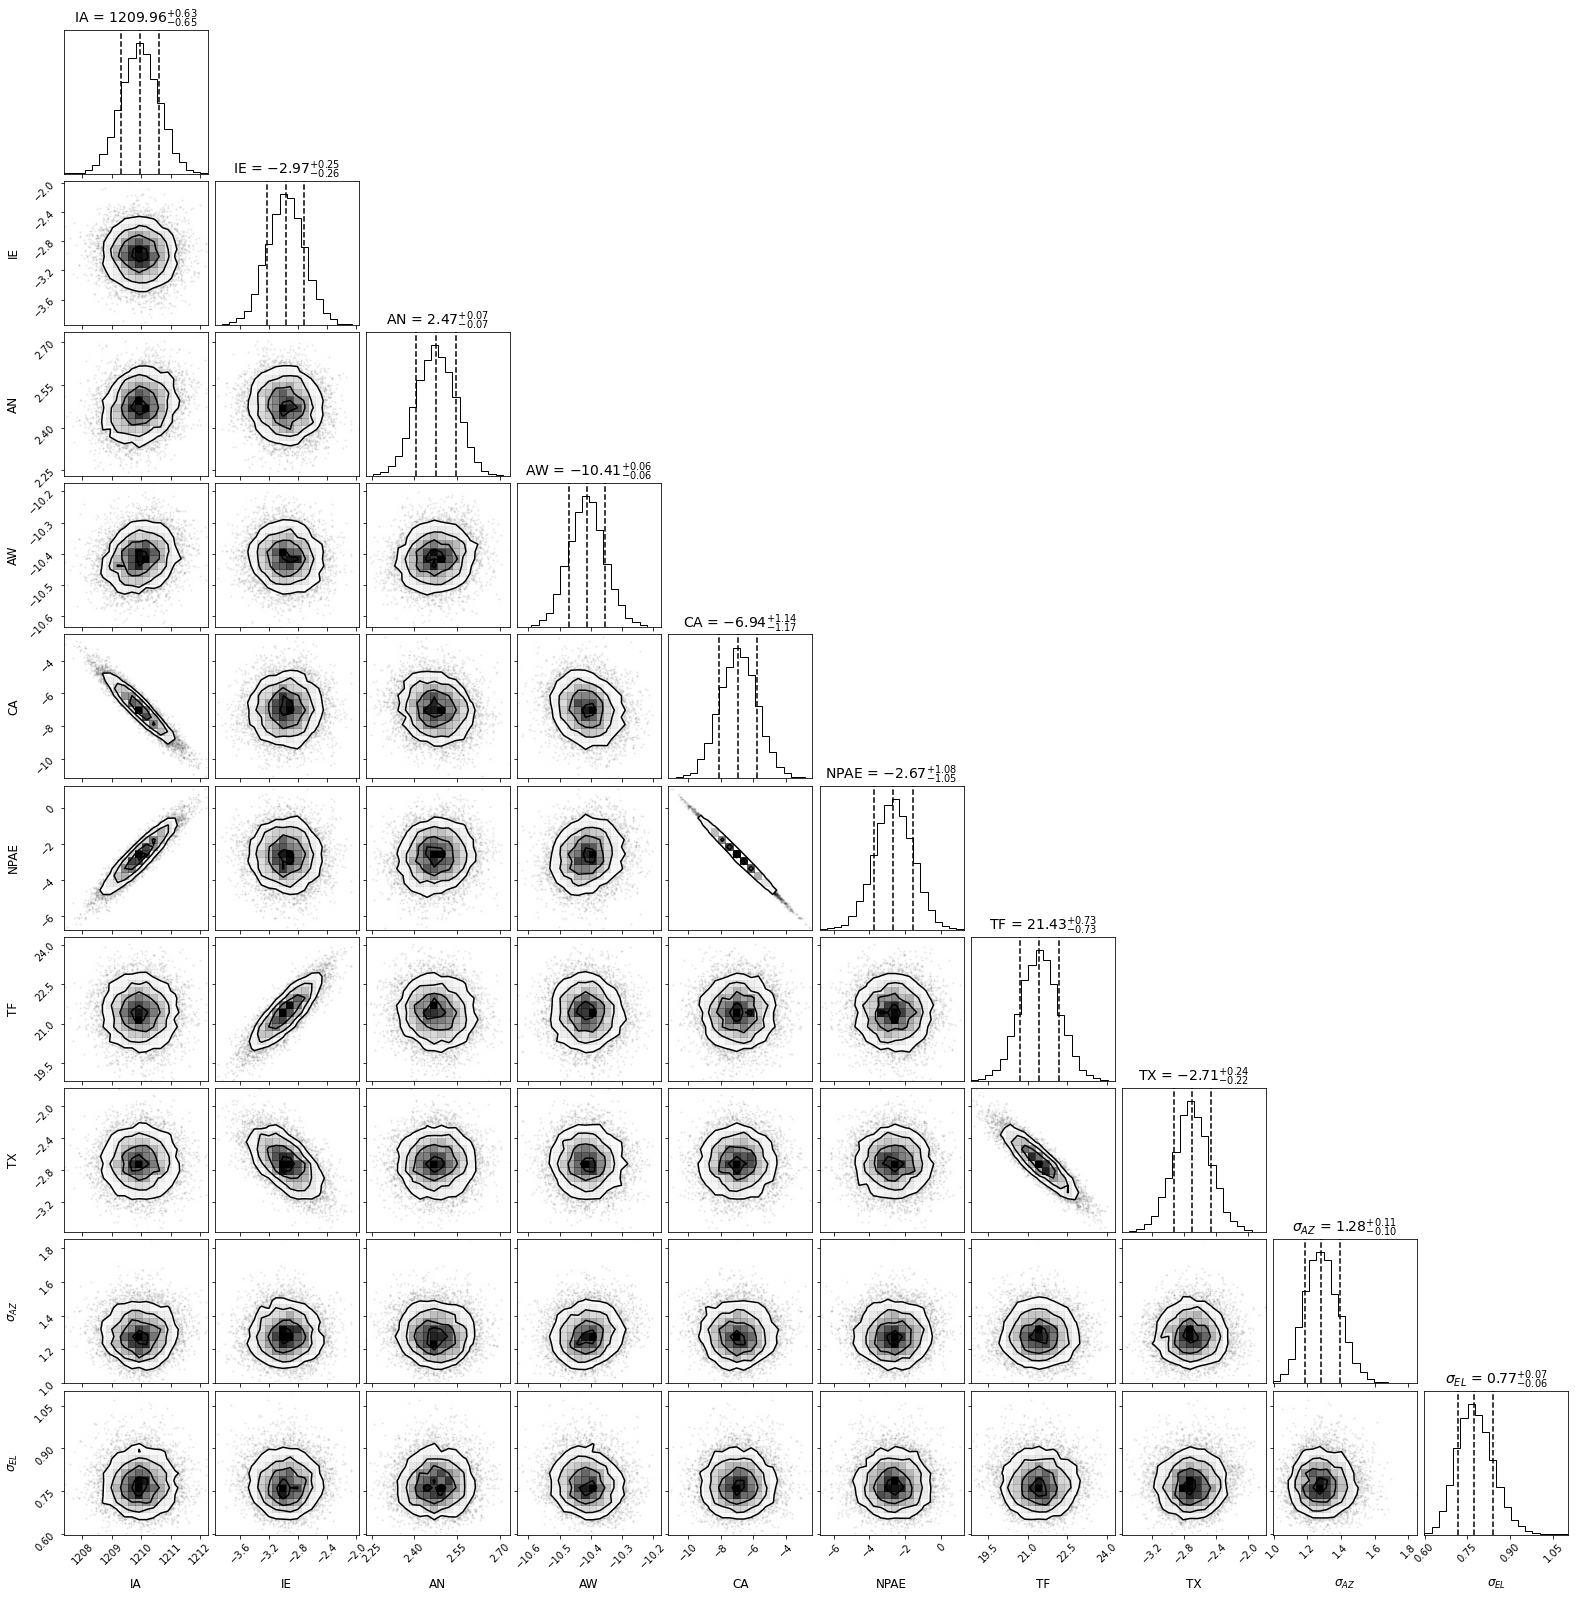

In [3]:
f = plot_corner(idata)

In [4]:
pars = best_fit_pars(idata)
pars

{'ia': 1209.30871677,
 'ie': -2.9843539,
 'an': 2.5222254,
 'aw': -10.37632057,
 'ca': -5.99712425,
 'npae': -3.43969063,
 'tf': 21.40765165,
 'tx': -2.70705054,
 'az_sigma': 0.57883469,
 'el_sigma': 0.77772686}

In [5]:
mc_coo = azel_model(coo_meas, **pars)

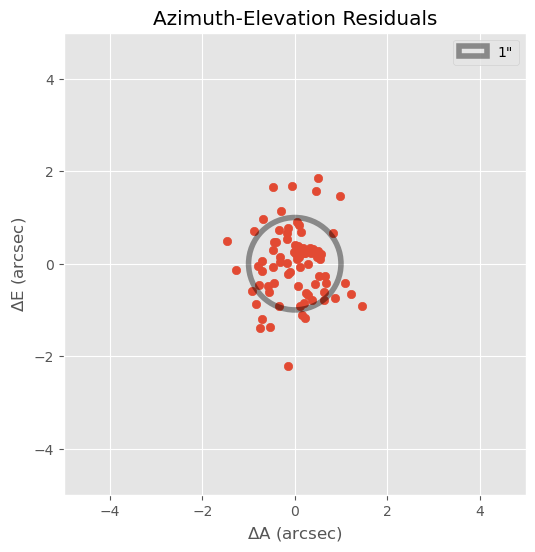

In [6]:
f = pointing_residuals(coo_ref, mc_coo)

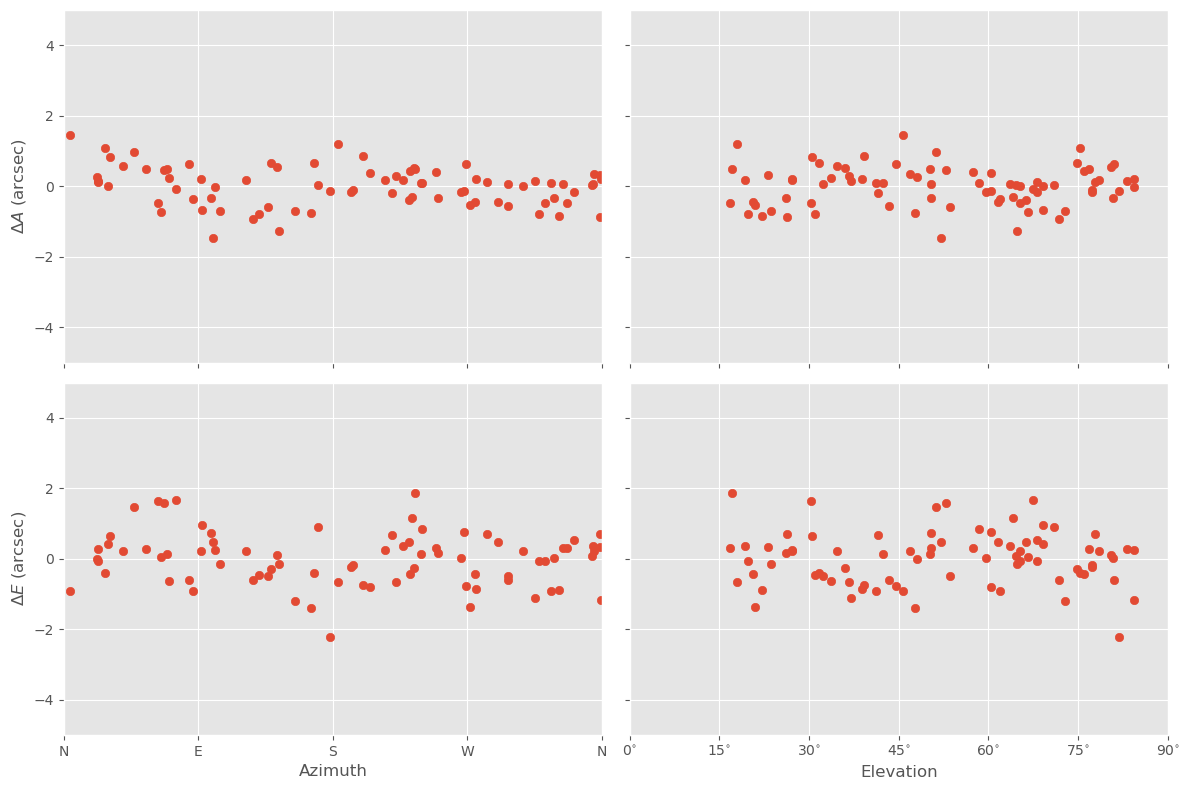

In [7]:
f = pointing_azel_resid(coo_ref, mc_coo)

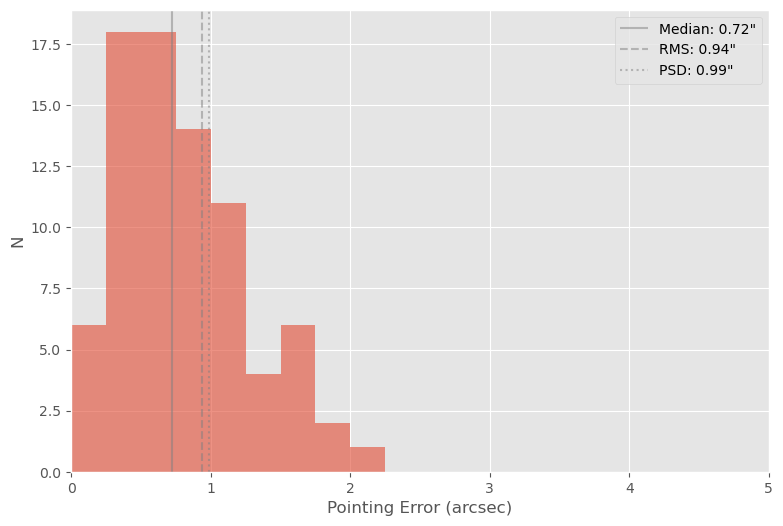

In [8]:
f = pointing_histogram(coo_ref, mc_coo)

In [9]:
# this is the f/9 pointing run from december 2020
f9_ref, f9_meas = read_raw_datfile("/home/tim/MMT/pointing_analysis/pointing_data/20201218/point.dat")

In [10]:
f9_idata = azel_fit(f9_ref, f9_meas)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [el_sigma, az_sigma, tx, tf, npae, ca, aw, an, ie, ia]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 51 seconds.


In [11]:
f9_pars = best_fit_pars(f9_idata)
f9_pars

{'ia': 1212.69486947,
 'ie': -40.68022993,
 'an': 0.06871657,
 'aw': -10.35513204,
 'ca': 2.25782047,
 'npae': 0.13115813,
 'tf': -0.4279217,
 'tx': -2.87523825,
 'az_sigma': 0.58583869,
 'el_sigma': 0.91589948}

In [12]:
f9_coo = azel_model(f9_meas, **f9_pars)

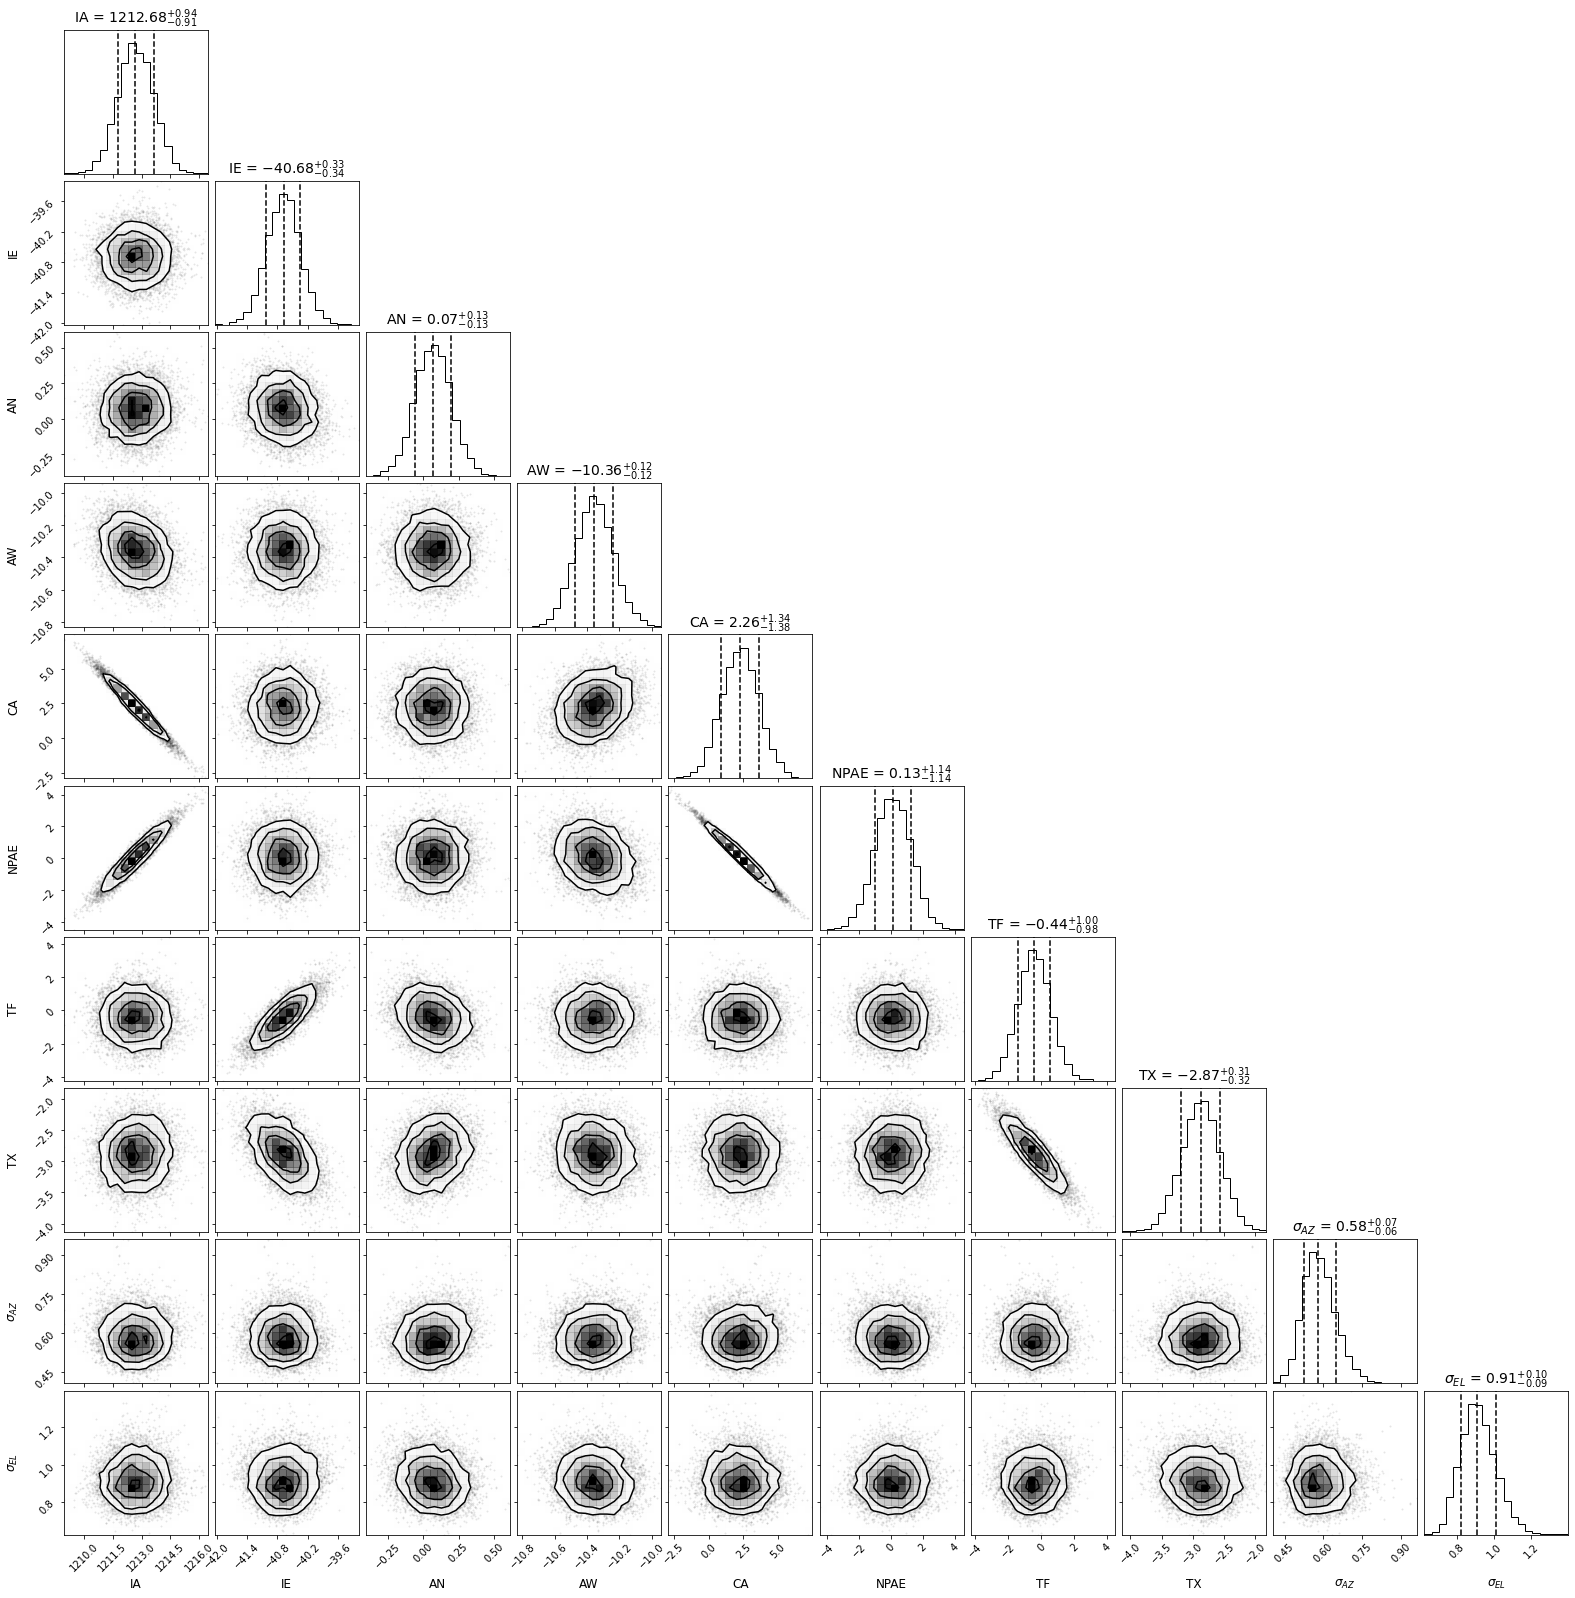

In [13]:
f = plot_corner(f9_idata)

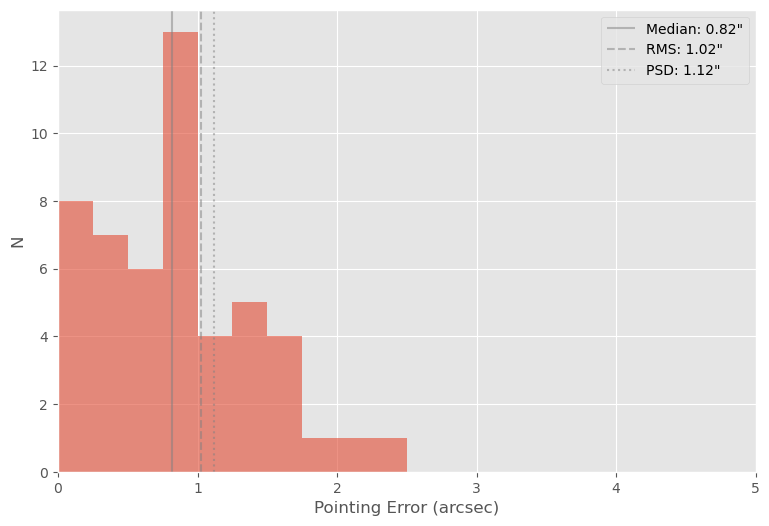

In [14]:
f = pointing_histogram(f9_ref, f9_coo)

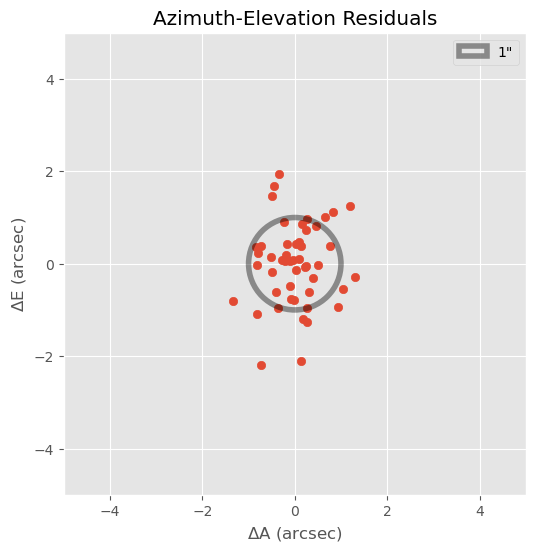

In [15]:
f = pointing_residuals(f9_ref, f9_coo)

In [19]:
# this is the f/5 hecto pointing run done in november 2021
# f5_ref, f5_meas = read_raw_datfile("/home/tim/MMT/pointing_analysis/pointing_data/20211129/point.dat")
f5_ref, f5_meas = read_raw_datfile("/home/tim/MMT/pointing_analysis/pointing_data/20211212/point_20211212.dat")

In [20]:
f5_idata = azel_fit(f5_ref, f5_meas)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [el_sigma, az_sigma, tx, tf, npae, ca, aw, an, ie, ia]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 51 seconds.


In [21]:
f5_pars = best_fit_pars(f5_idata)
f5_pars

{'ia': 1209.25662578,
 'ie': -15.42191242,
 'an': 1.13387043,
 'aw': -11.41590808,
 'ca': 7.26996621,
 'npae': -3.84813589,
 'tf': 0.63062674,
 'tx': -2.44953883,
 'az_sigma': 2.13932684,
 'el_sigma': 1.29274013}

In [22]:
f5_coo = azel_model(f5_meas, **f5_pars)

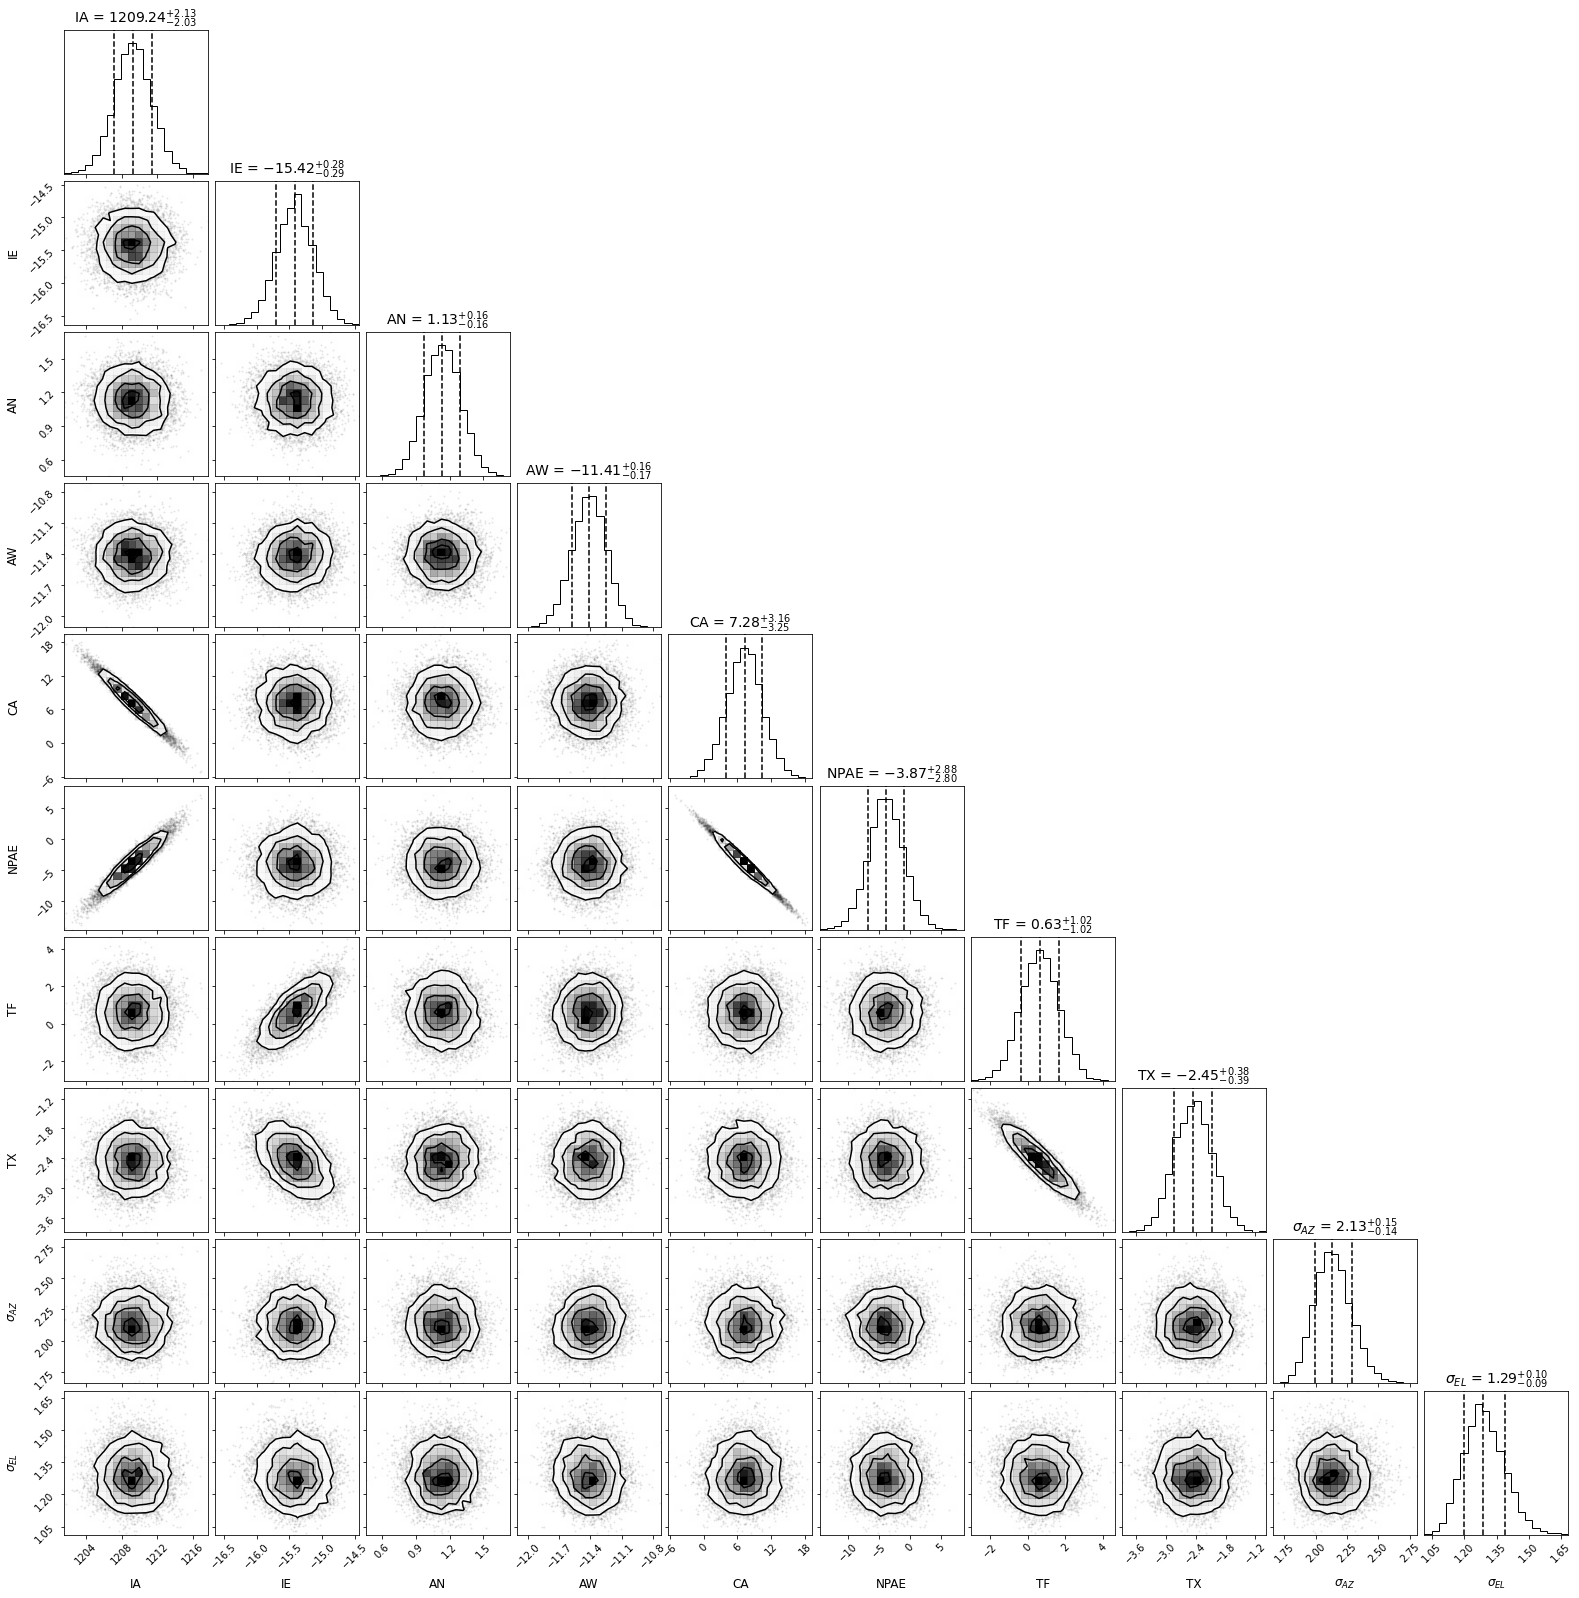

In [23]:
f = plot_corner(f5_idata)

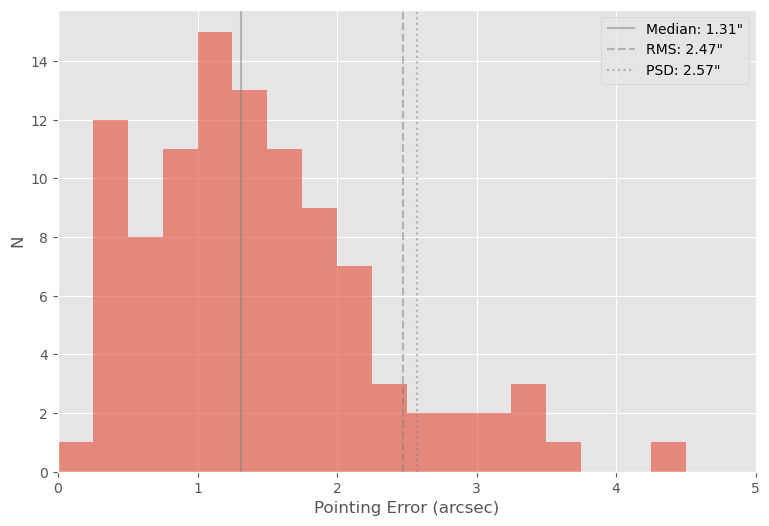

In [24]:
f = pointing_histogram(f5_ref, f5_coo)

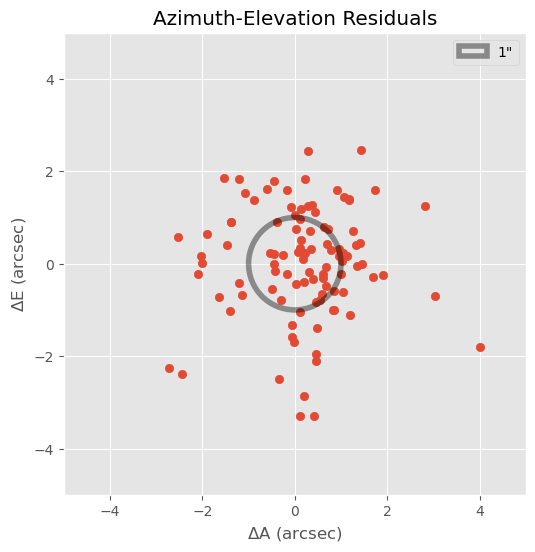

In [25]:
f = pointing_residuals(f5_ref, f5_coo)

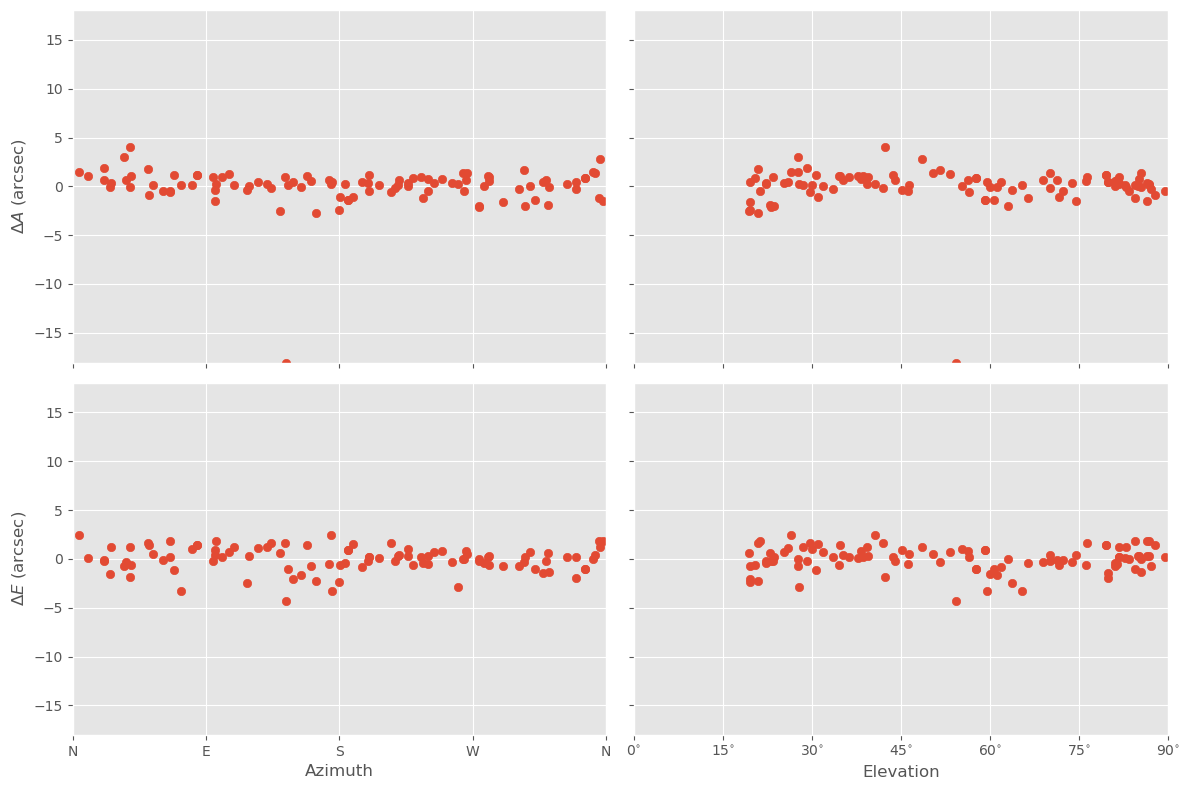

In [26]:
# this shows the need for better sampling of stars across elevation
f = pointing_azel_resid(f5_ref, f5_coo)

In [24]:
# this is the old K&E 0th order pointing data taken back in march of 2003
oldke_ref, oldke_meas = read_raw_datfile("/home/tim/MMT/pointing_analysis/pointing_data/20030320/pointing_3_20_2003")

In [25]:
oldke_idata = azel_fit(oldke_ref, oldke_meas)
oldke_pars = best_fit_pars(oldke_idata)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [el_sigma, az_sigma, tx, tf, npae, ca, aw, an, ie, ia]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 46 seconds.


In [26]:
oldke_pars, pars

({'ia': 1189.71193237,
  'ie': -29.23892793,
  'an': -4.10938986,
  'aw': -13.52092585,
  'ca': 7.39078842,
  'npae': -17.18129593,
  'tf': 21.41012885,
  'tx': -7.53819631,
  'az_sigma': 1.47418344,
  'el_sigma': 1.67508239},
 {'ia': 1209.30871677,
  'ie': -2.9843539,
  'an': 2.5222254,
  'aw': -10.37632057,
  'ca': -5.99712425,
  'npae': -3.43969063,
  'tf': 21.40765165,
  'tx': -2.70705054,
  'az_sigma': 0.57883469,
  'el_sigma': 0.77772686})

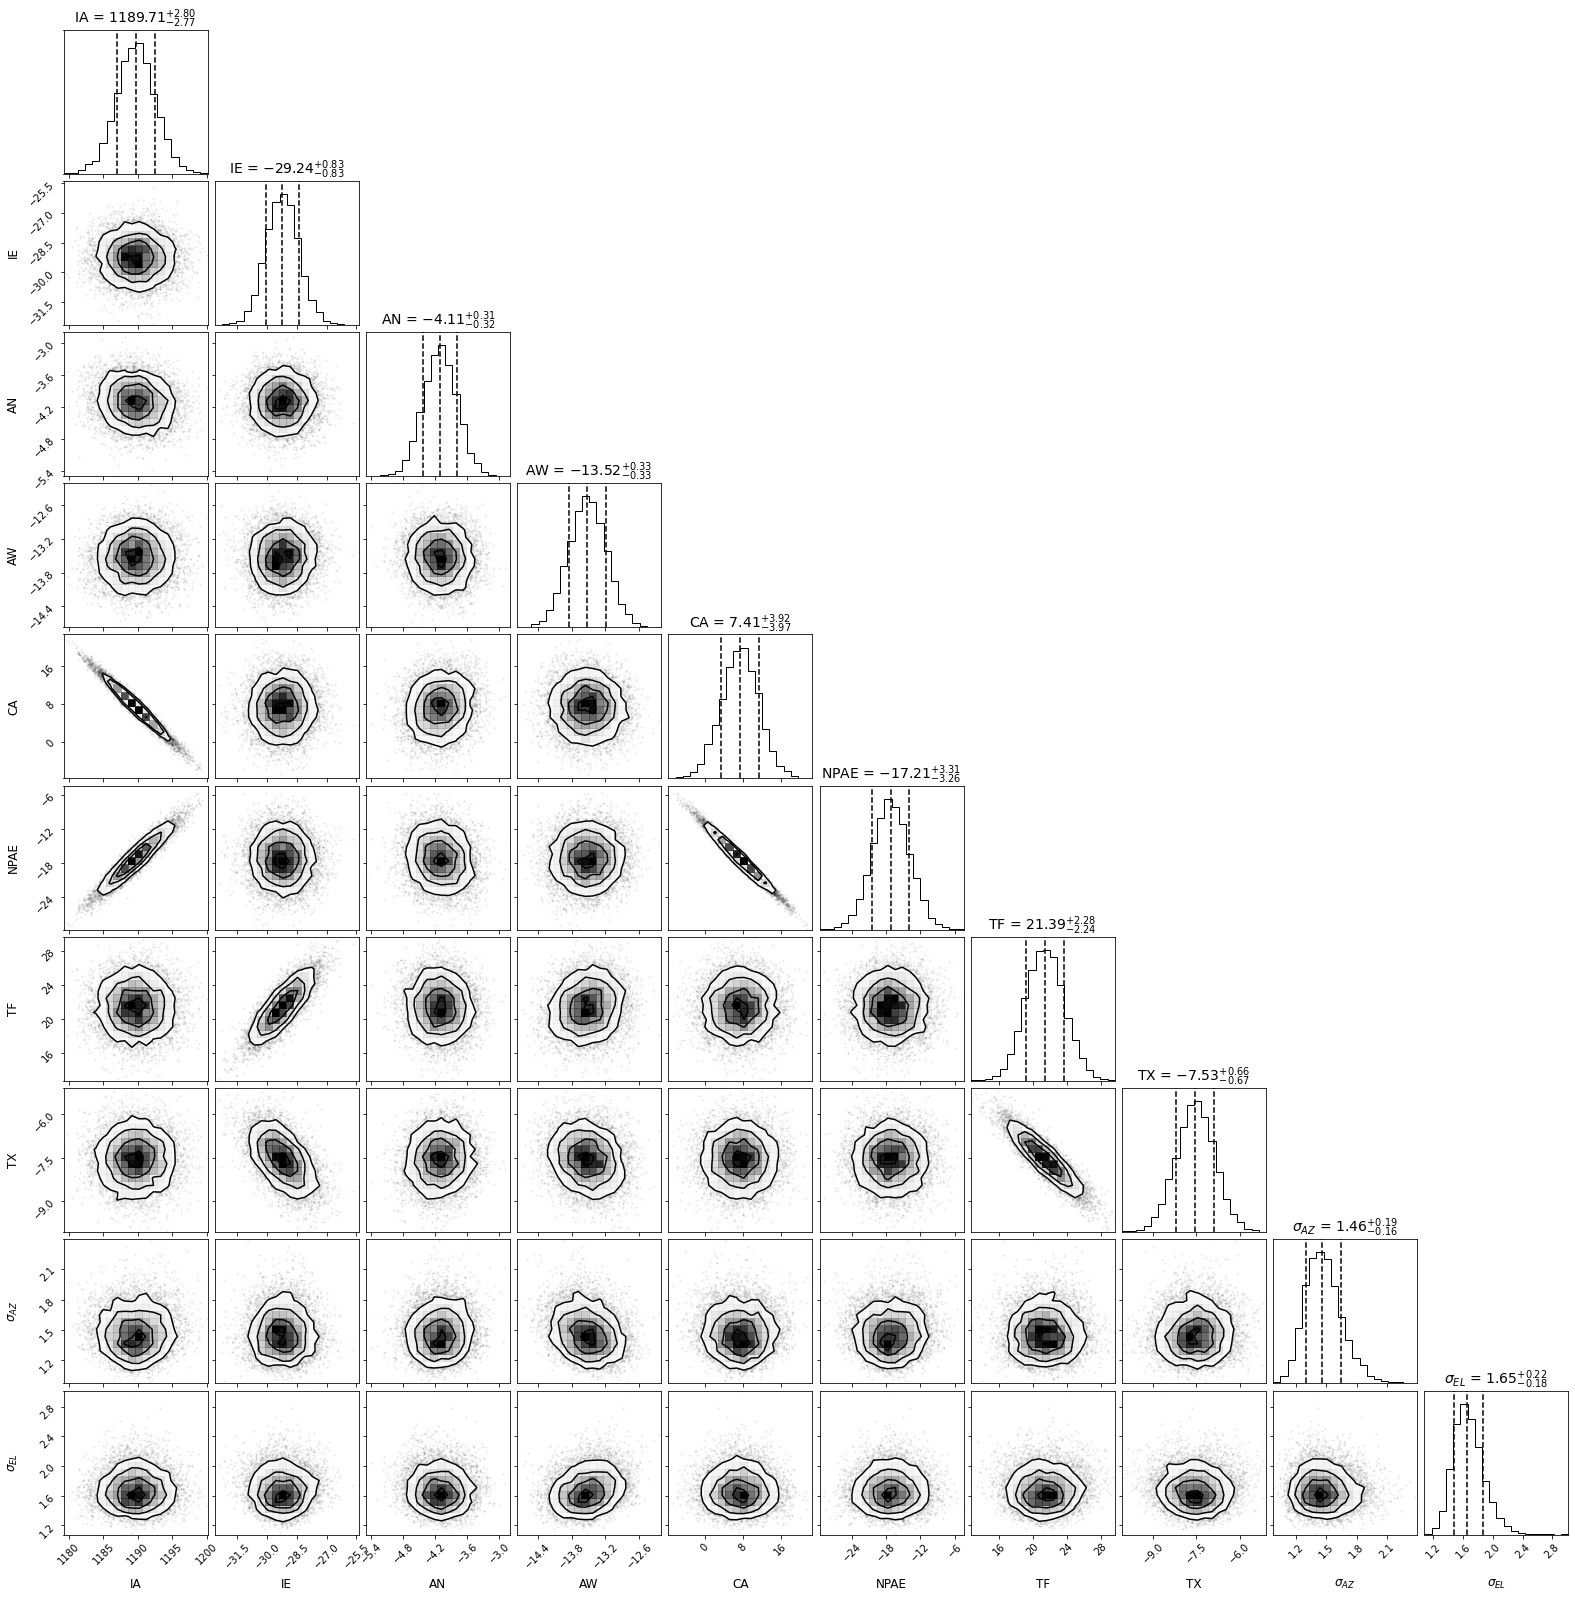

In [27]:
f = plot_corner(oldke_idata)

In [28]:
oldke_coo = azel_model(oldke_meas, **oldke_pars)

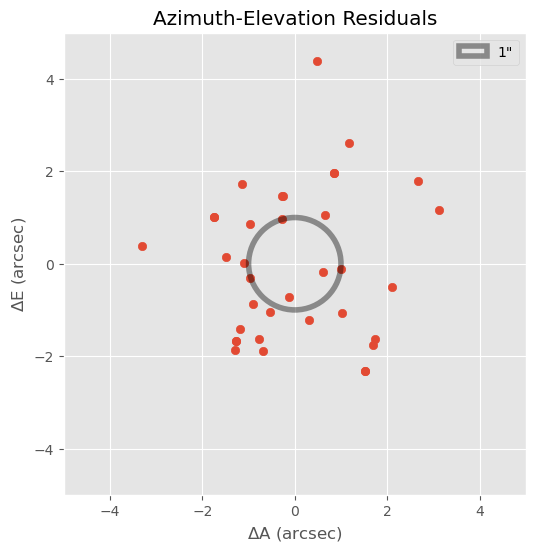

In [29]:
# the az and el dispersions are almost twice as large here as in other pointing runs. i think the stars
# were centered by eye visually in the K&E. the camera used for the 2021 K&E run makes a significant difference.
f = pointing_residuals(oldke_ref, oldke_coo)

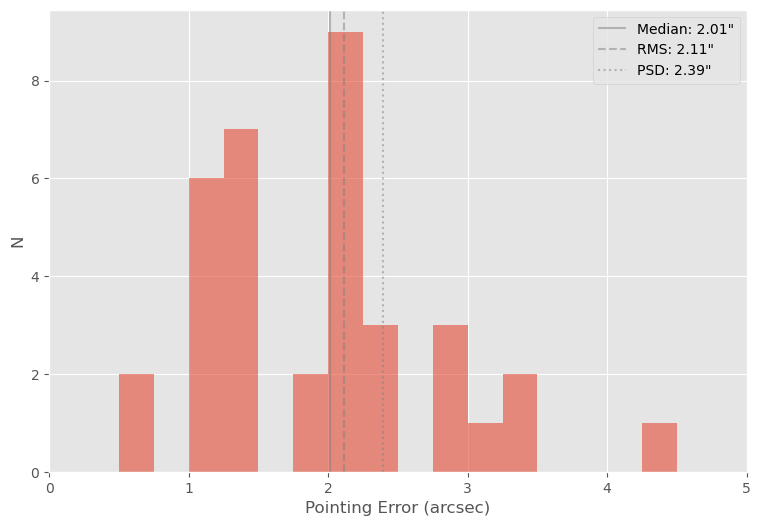

In [30]:
f = pointing_histogram(oldke_ref, oldke_coo)